<a href="https://colab.research.google.com/github/Heoyuna0819/machine_learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)


In [62]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [72]:
# 3. 시퀀스 생성
window = 6
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [73]:
#4.데이터분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

훈련 데이터 크기: (255, 6, 1) (255, 1)
테스트 데이터 크기: (64, 6, 1) (64, 1)


In [74]:
#5.LSTM 모델 정의 (Dropout 포함)
model = Sequential([
    LSTM(30, activation='tanh', input_shape=(window, 1)),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
# 6️.모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

# 7️.모델 학습
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0334 - val_loss: 0.0228
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - val_loss: 0.0110
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0109
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0093
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 0.0093
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0099
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0092
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - val_loss: 0.0092
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0092
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - val_loss: 0.0091
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0097
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [76]:
# 8️.예측
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 


In [79]:
# 9️.MSE 및 RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f" Test MSE: {mse:.6f}")
print(f" Test RMSE: {rmse:.6f}")


 Test MSE: 0.015409
 Test RMSE: 0.124132


In [80]:
# 10. 예측 결과를 역정규화 (실제 값 단위로 되돌리기)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

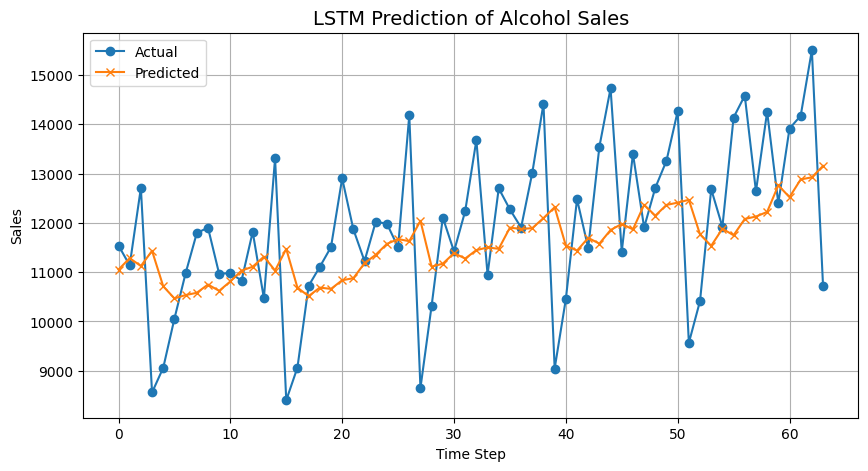

In [81]:
# 11️.예측 결과 그래프 시각화
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='Predicted', marker='x')
plt.title('LSTM Prediction of Alcohol Sales', fontsize=14)
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

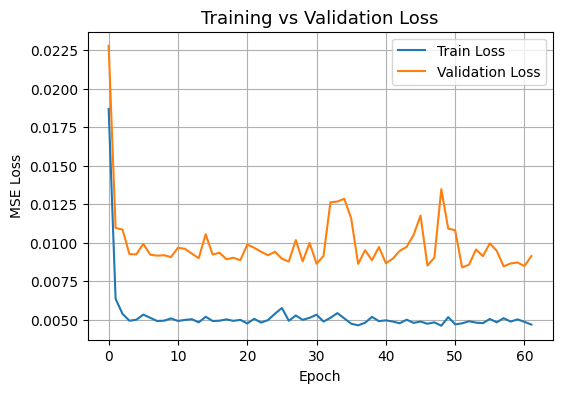

In [82]:
# 12️. 학습 손실(Loss) 그래프
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss', fontsize=13)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()